### Notebook 1 - trade graph topology analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as plticker
import os
import warnings
warnings.filterwarnings('ignore')
centr_folder = '/Users/koshelev/Documents/lmu/thesis/2-centralities_computation/computed_centralities/trade/'
output_folder = 'centrality_ranking_visual/trade/'

general graph topology analysis

In [2]:
graph_descr = pd.read_csv('/Users/koshelev/Documents/lmu/thesis/3-graph_description/graph_descriptions/trade.csv', index_col=0)
graph_descr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 1988 to 2021
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   nodes         34 non-null     int64  
 1   edges         34 non-null     int64  
 2   degrees_w     34 non-null     float64
 3   degrees_nw    34 non-null     float64
 4   alcc_nw       34 non-null     float64
 5   spl_nw        34 non-null     float64
 6   algebrcon_nw  34 non-null     float64
 7   deg_centr     34 non-null     float64
dtypes: float64(6), int64(2)
memory usage: 2.4 KB


In [3]:
graph_descr.describe()

nodes         edges     degrees_w  degrees_nw    alcc_nw  \
count   34.000000     34.000000  3.400000e+01   34.000000  34.000000   
mean   227.411765  17901.029412  7.935825e+07  155.547734   0.798781   
std     11.378123   5561.867233  4.373341e+07   44.110977   0.016389   
min    199.000000   4791.000000  1.733868e+07   47.671642   0.777355   
25%    221.500000  14065.000000  4.294391e+07  126.597472   0.784600   
50%    233.500000  20406.000000  7.380374e+07  174.054285   0.797486   
75%    235.000000  22258.250000  1.207270e+08  189.923622   0.810262   
max    236.000000  23069.000000  1.464449e+08  196.102128   0.859048   

          spl_nw  algebrcon_nw  deg_centr  
count  34.000000     34.000000  34.000000  
mean    0.889820      3.257428   0.679821  
std     0.250354      3.152158   0.173487  
min     0.239403      0.991319   0.238358  
25%     0.798948      0.998433   0.572341  
50%     1.007865      1.994110   0.745514  
75%     1.070114      4.710712   0.815018  
max     1.106205      9.990885   0.838043

In [4]:
graph_descr.head()

nodes  edges     degrees_w  degrees_nw   alcc_nw    spl_nw  \
1988    201   4791  1.733868e+07   47.671642  0.859048  0.239403   
1989    201   6546  2.361175e+07   65.134328  0.823337  0.345075   
1990    202   7860  2.716548e+07   77.821782  0.812359  0.450643   
1991    199   8336  2.884452e+07   83.778894  0.802795  0.502462   
1992    221  10528  2.942381e+07   95.276018  0.796802  0.563266   

      algebrcon_nw  deg_centr  
1988      0.994325   0.238358  
1989      0.993742   0.325672  
1990      0.998835   0.387173  
1991      1.995073   0.423126  
1992      0.993622   0.433073

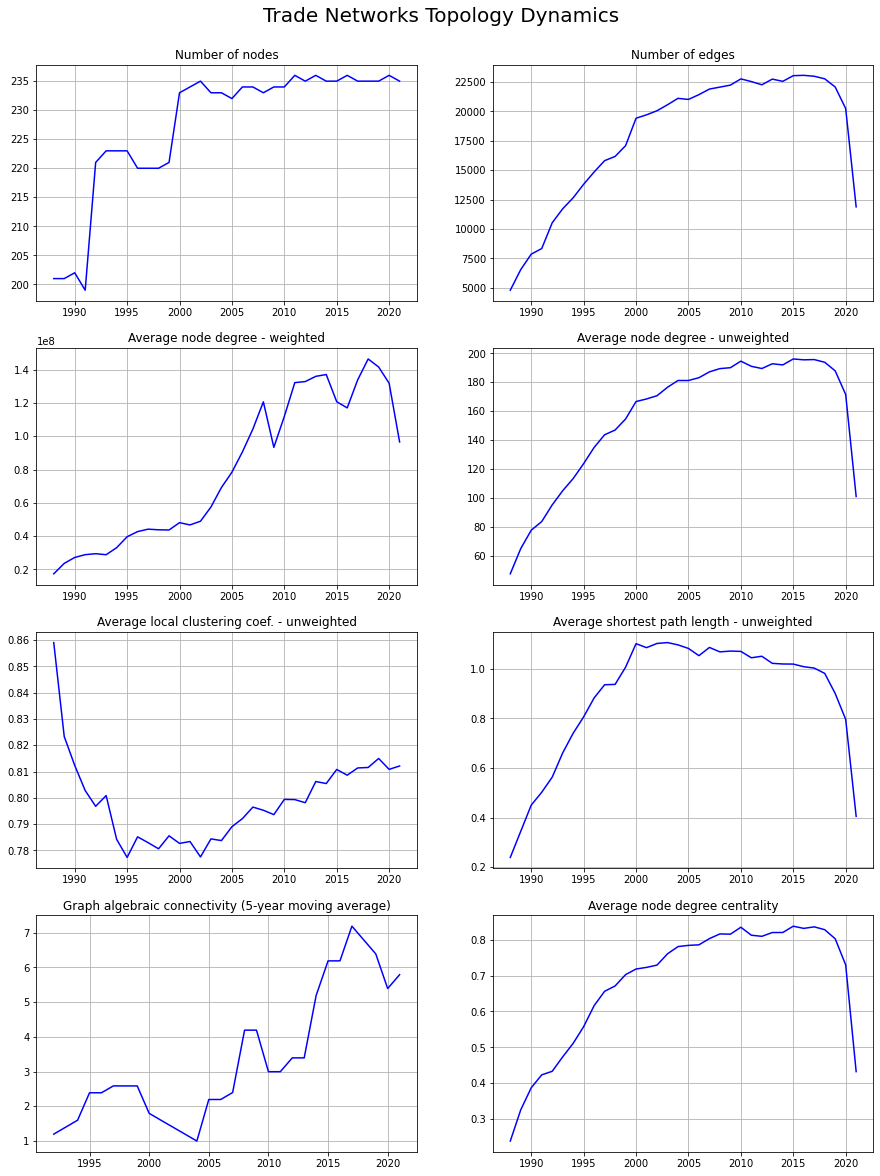

In [5]:
figure, axis = plt.subplots(4, 2, figsize=(15, 20))
figure.suptitle('Trade Networks Topology Dynamics', fontsize=20, y=0.92)

axis[0, 0].plot(graph_descr['nodes'], color='blue')
axis[0, 0].set_title('Number of nodes')
axis[0, 0].grid()

axis[0, 1].plot(graph_descr['edges'], color='blue')
axis[0, 1].set_title('Number of edges')
axis[0, 1].grid()
  
axis[1, 0].plot(graph_descr['degrees_w'], color='blue')
axis[1, 0].set_title('Average node degree - weighted')
axis[1, 0].grid()

axis[1, 1].plot(graph_descr['degrees_nw'], color='blue')
axis[1, 1].set_title('Average node degree - unweighted')
axis[1, 1].grid()
  
axis[2, 0].plot(graph_descr['alcc_nw'], color='blue')
axis[2, 0].set_title('Average local clustering coef. - unweighted')
axis[2, 0].grid()

axis[2, 1].plot(graph_descr['spl_nw'], color='blue')
axis[2, 1].set_title('Average shortest path length - unweighted')
axis[2, 1].grid()
  
# Graph algebraic connectivity and average node degree 
axis[3, 0].plot(graph_descr['algebrcon_nw'].rolling(5).mean(), color='blue')
axis[3, 0].set_title('Graph algebraic connectivity (5-year moving average)')
axis[3, 0].grid()

# Graph algebraic connectivity and average node degree 
axis[3, 1].plot(graph_descr['deg_centr'], color='blue')
axis[3, 1].set_title('Average node degree centrality')
axis[3, 1].grid()

plt.savefig('topology_dynamics_visual/trade.pdf', bbox_inches='tight')

# Combine all the operations and display
plt.show()

node centrality analysis

In [6]:
centr_types = []
centr_dfs = []
centr_rank_dfs = []
for filename in os.listdir(centr_folder):
    centr_types.append(filename[:-4])
    print(filename[:-4])
    centr_dfs.append(pd.read_csv(centr_folder+filename, index_col=0).sort_values(by=2020, axis=1, ascending=False))
    centr_rank_dfs.append((centr_dfs[-1] * (-1)).rank(axis=1))

betweenness_centr_uw
pagerank_centr_uw
degree_centr
pagerank_centr
eigenv_centr
eigenv_centr_uw
closeness_centr
betweenness_centr


In [7]:
centrality_names = {
    'betweenness_centr_uw' : 'Betweenness Centrality - Unweighted',
    'betweenness_centr' : 'Betweenness Centrality - Weighted',
    'pagerank_centr_uw' : 'PageRank Centrality - Unweighted',
    'degree_centr' : 'Degree Centrality - Weighted',
    'pagerank_centr' : 'PageRank Centrality - Weighted',
    'eigenv_centr' : 'Eigenvector Centrality - Weighted',
    'eigenv_centr_uw' : 'Eigenvector Centrality - Unweighted',
    'closeness_centr' : 'Closeness Centrality - Weighted' 
}

In [8]:
def plot_bumpchart(df, title, topN=20):
    df.fillna(method='ffill', inplace=True)
    plt.figure(figsize=(50, 22))
    ax = plt.subplot()
    colors = list(plt.cm.tab20_r(np.arange(20)))
    ax.set_prop_cycle('color', colors)
    plt.gca().invert_yaxis()
    plt.plot(df.iloc[5:, :topN], 'o-', linewidth=2)
    plt.legend(df.columns[:topN], loc="lower center", ncol=len(df.columns[:topN]), fontsize=20)
    plt.yticks(np.arange(1, 41, 1.0), fontsize=20)
    plt.ylim(43, 0)
    plt.xticks(fontsize=20)
    plt.xlim(df.index[5], df.index[-2])
    loc = plticker.MultipleLocator(base=1.0)
    ax.xaxis.set_major_locator(loc)
    plt.xlabel('Year', fontsize=40)
    plt.ylabel('Centrality Rank', fontsize=40)
    plt.grid(axis='x')
    plt.title(centrality_names[title], fontsize=40)
    plt.savefig(f'{output_folder}{title}_top{topN}.pdf', bbox_inches='tight')
    plt.show()

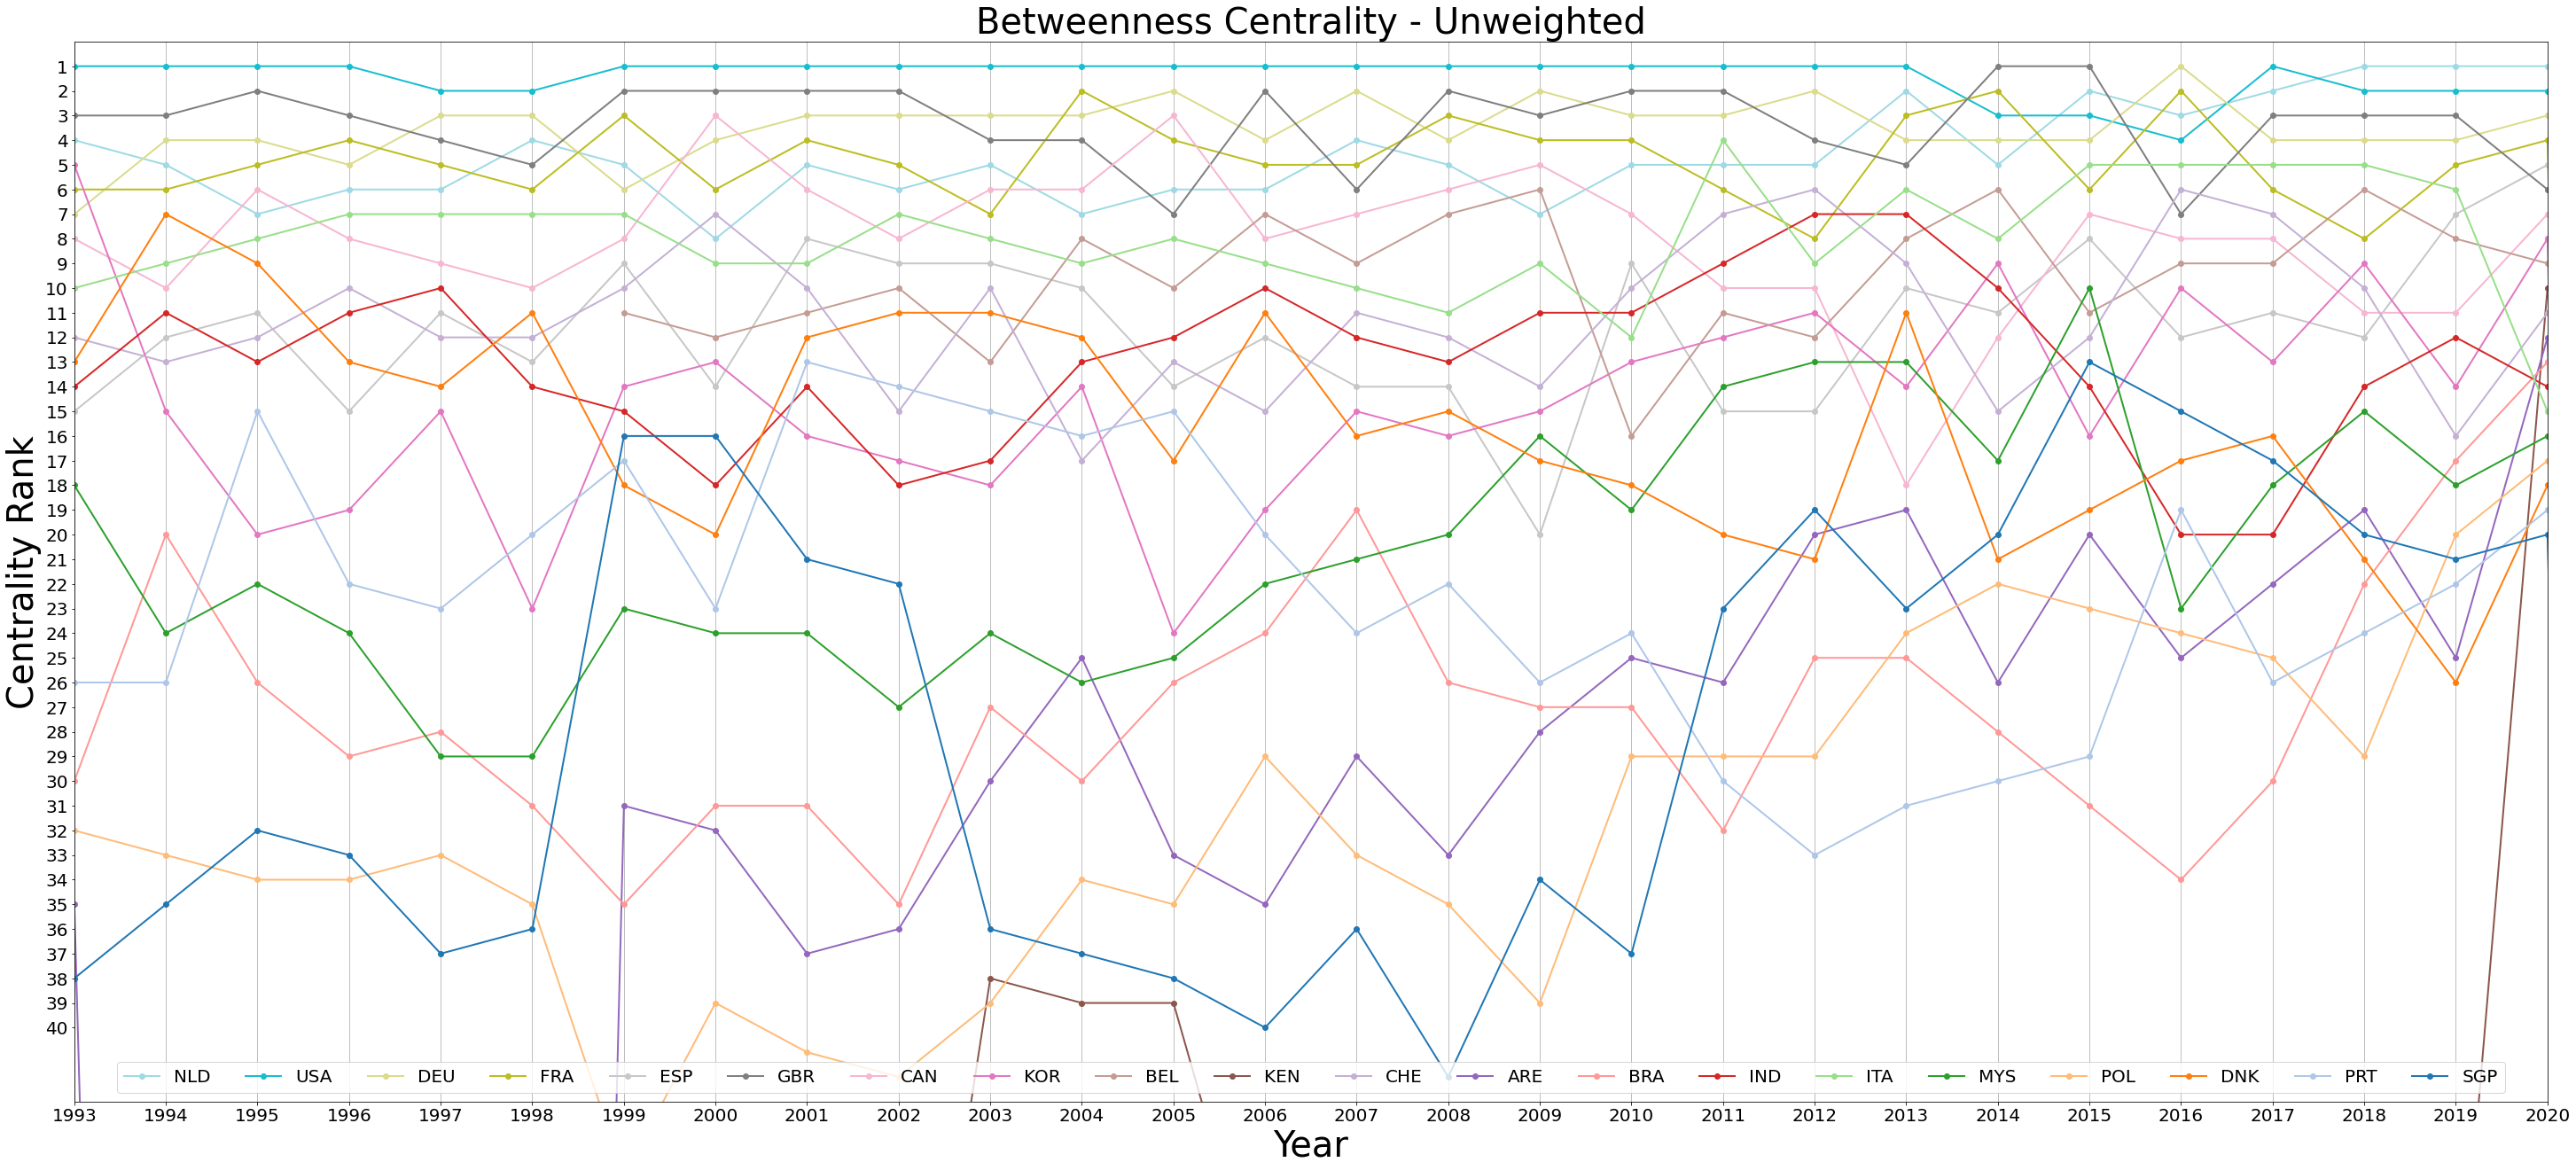

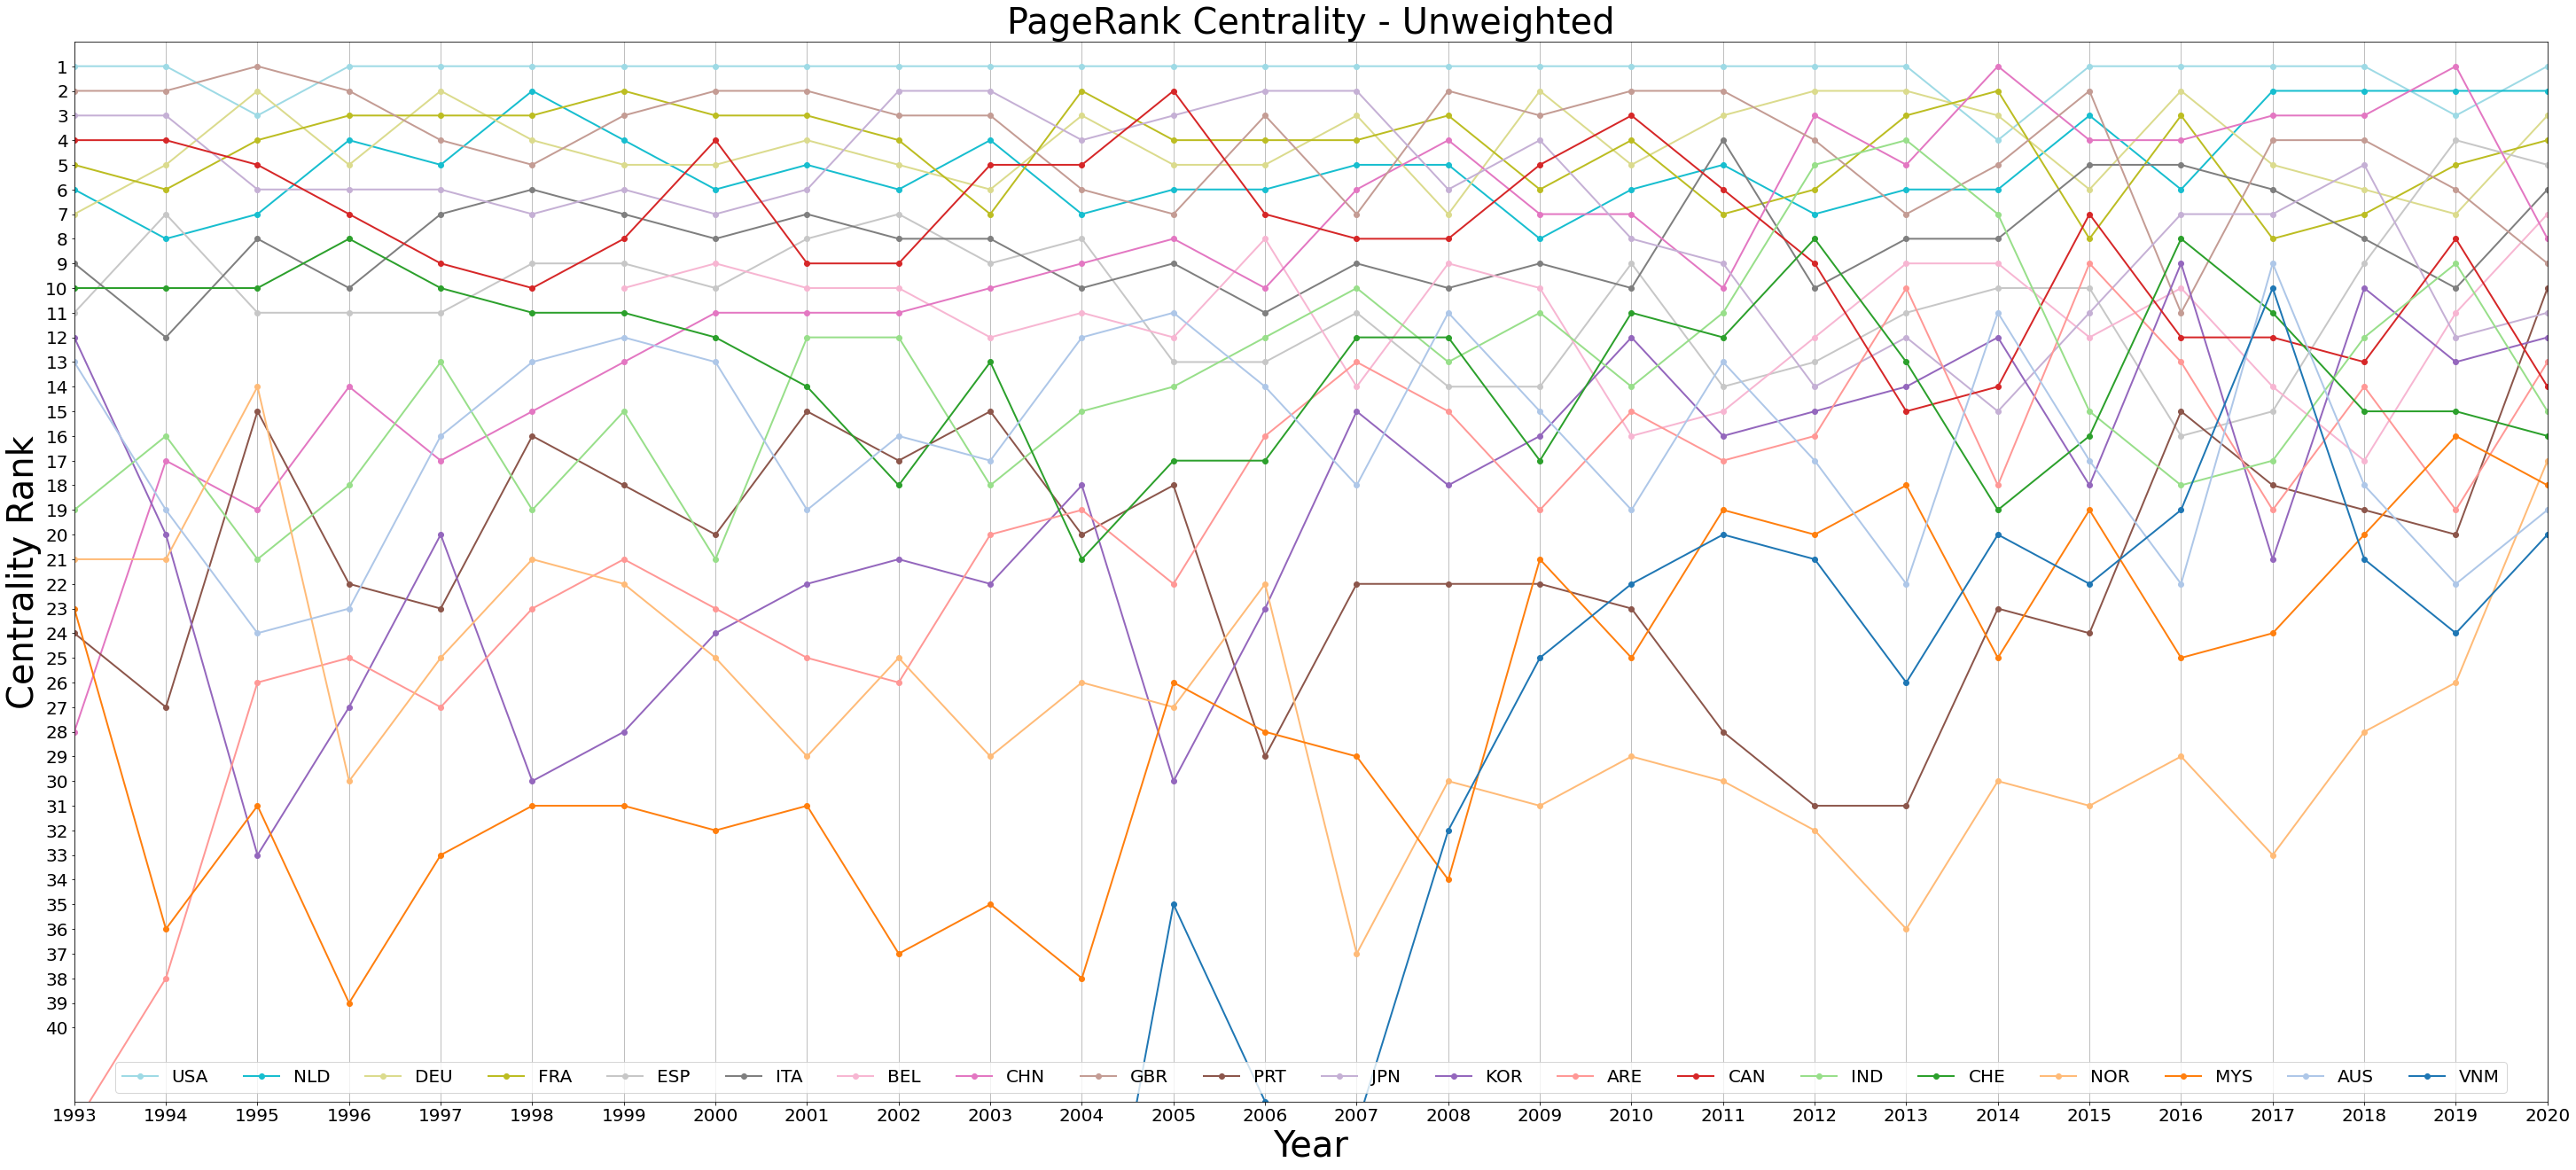

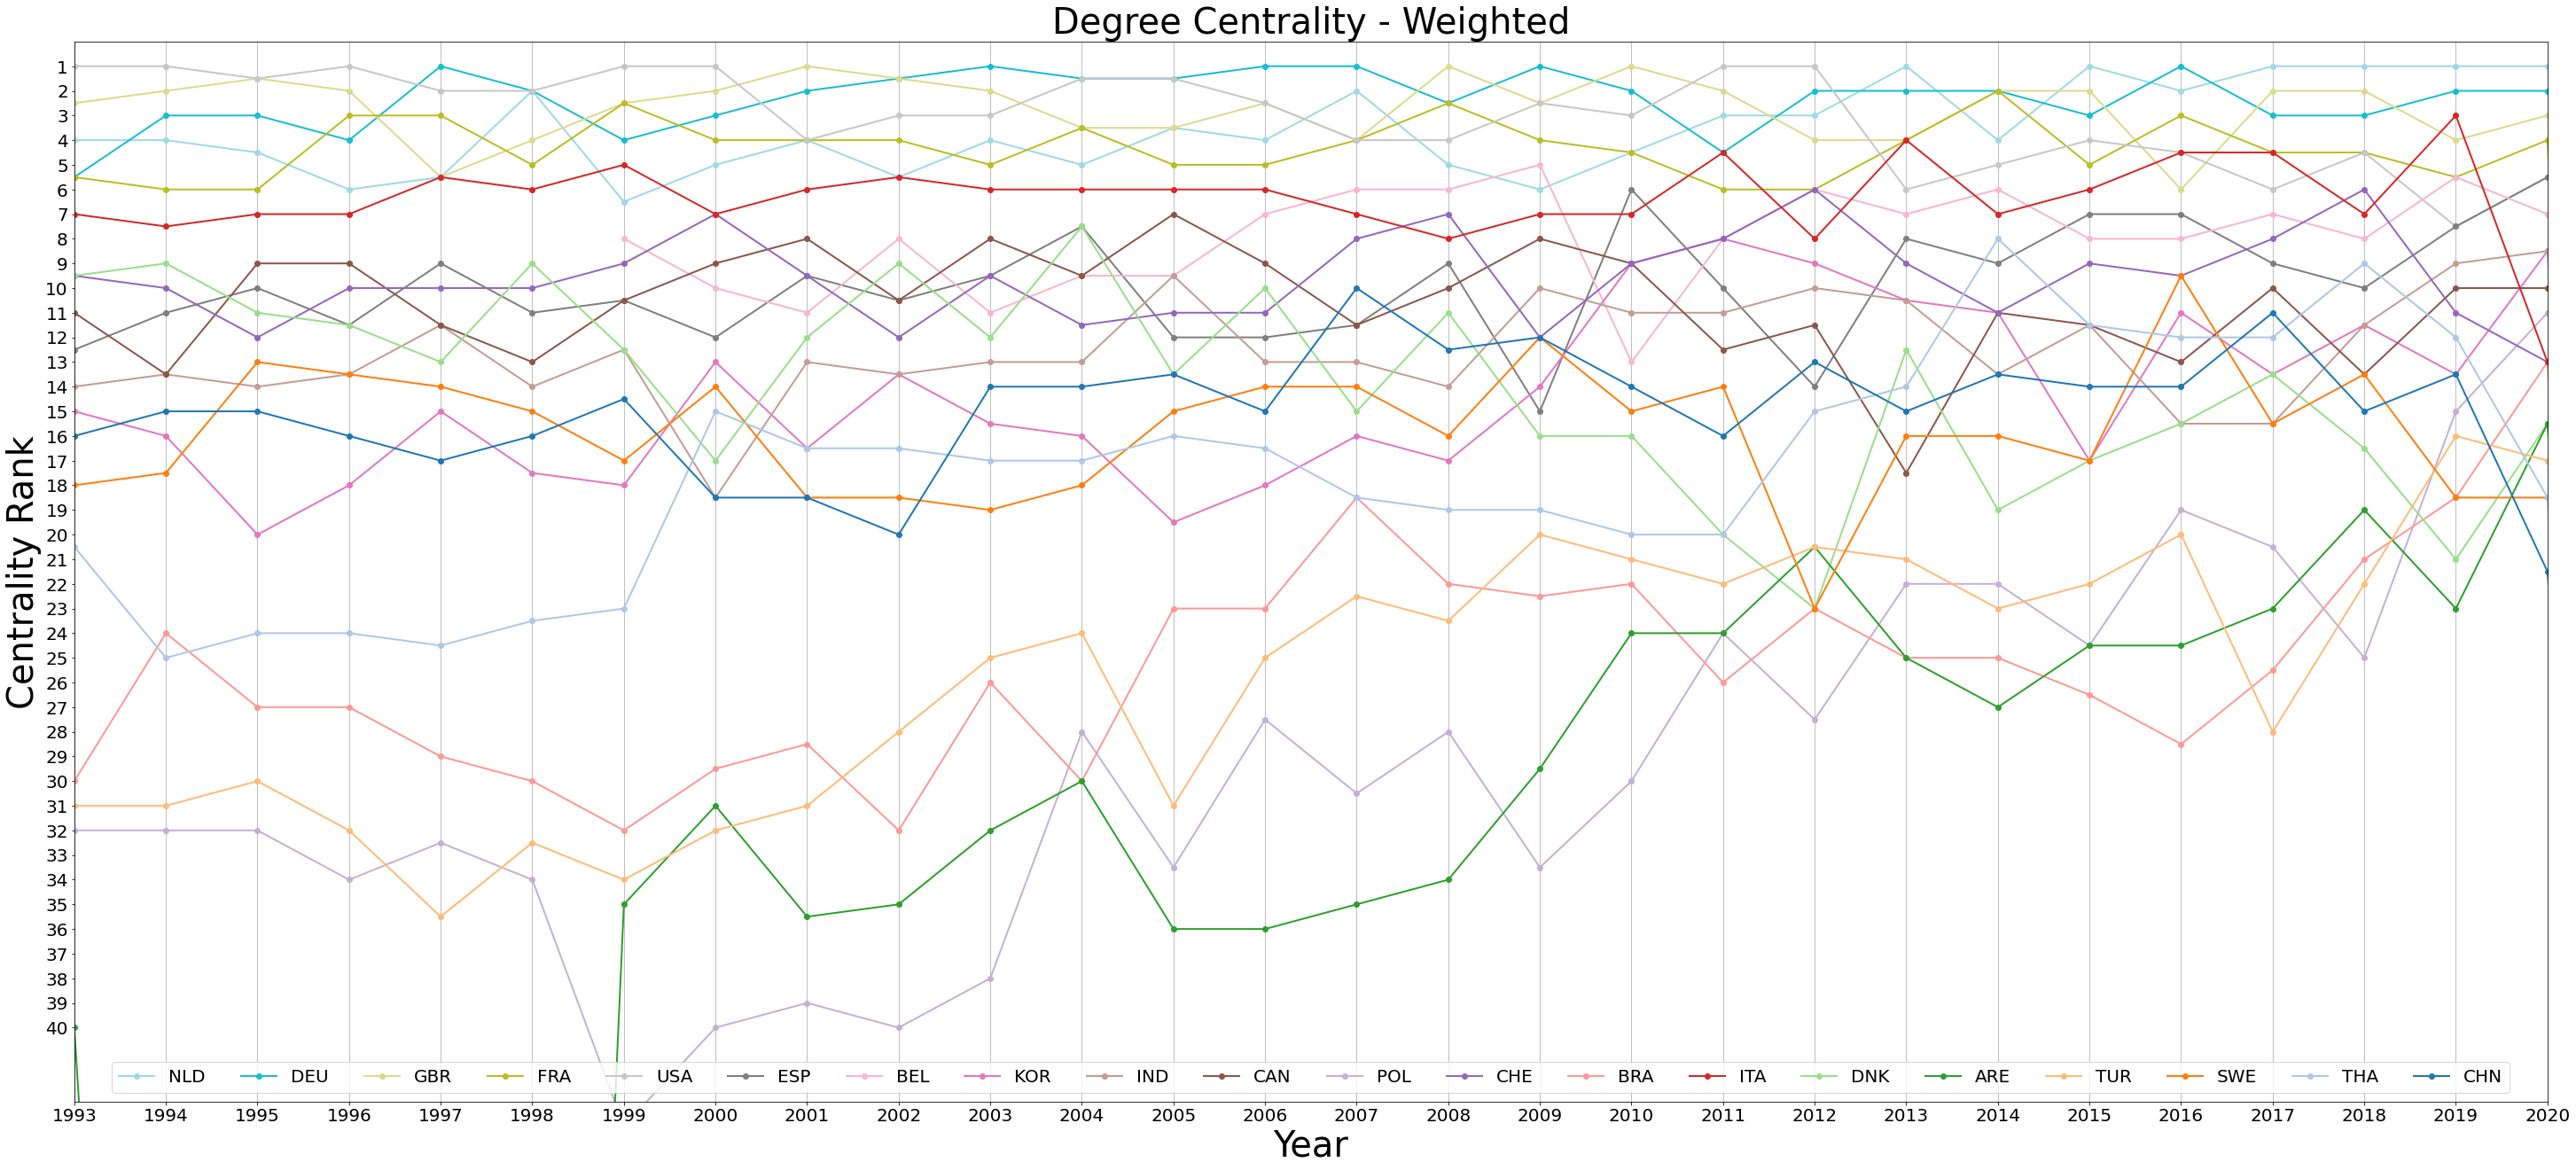

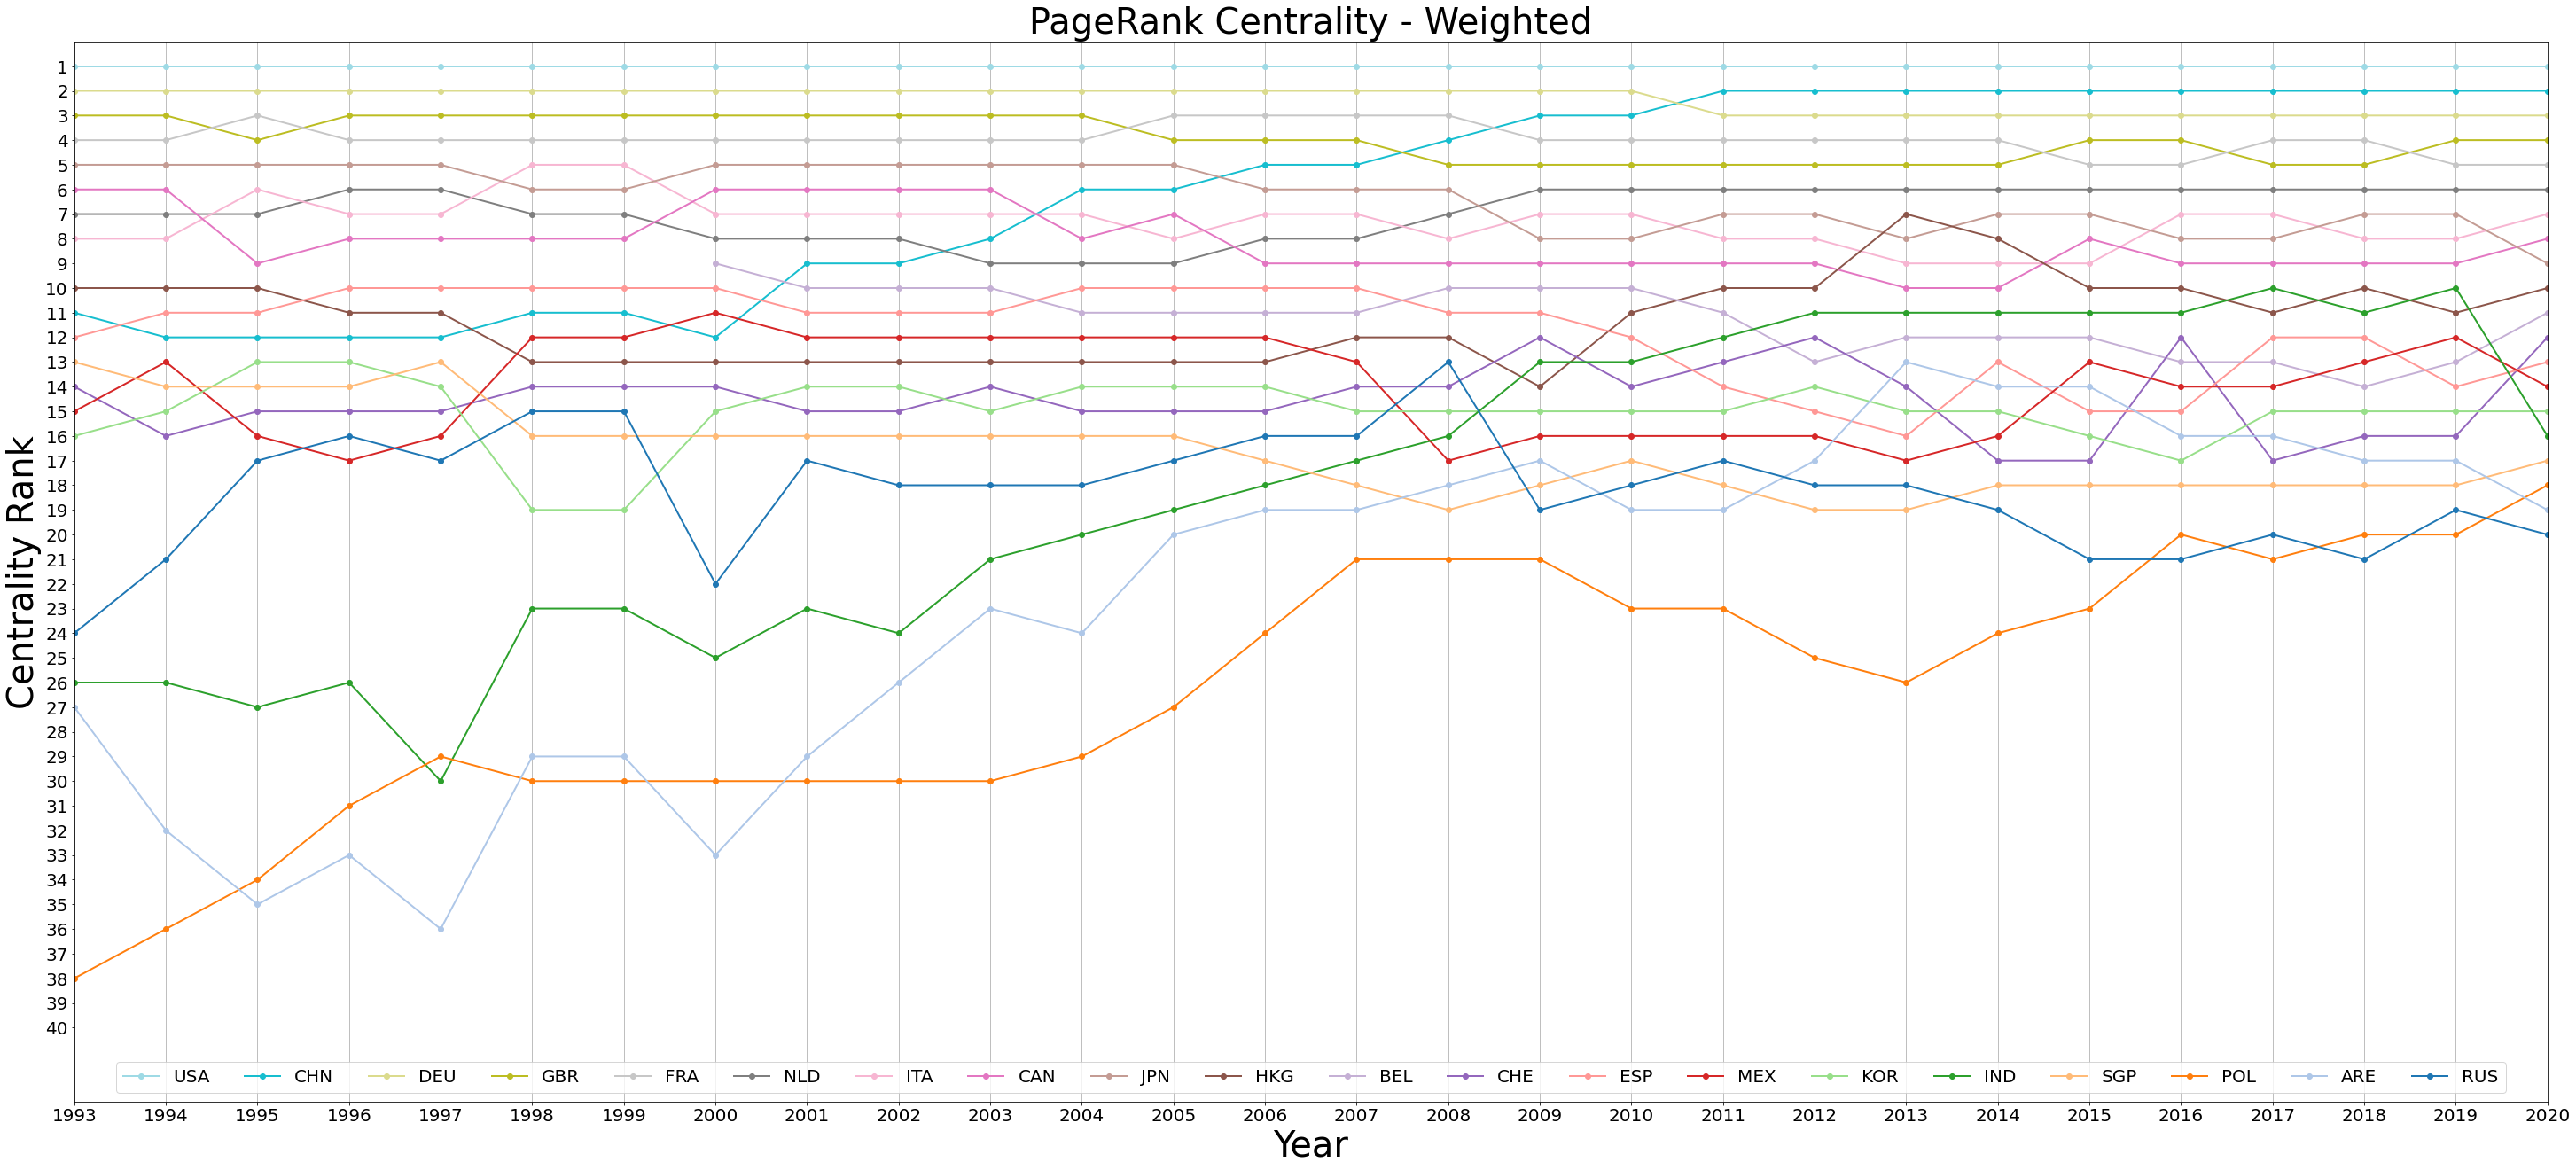

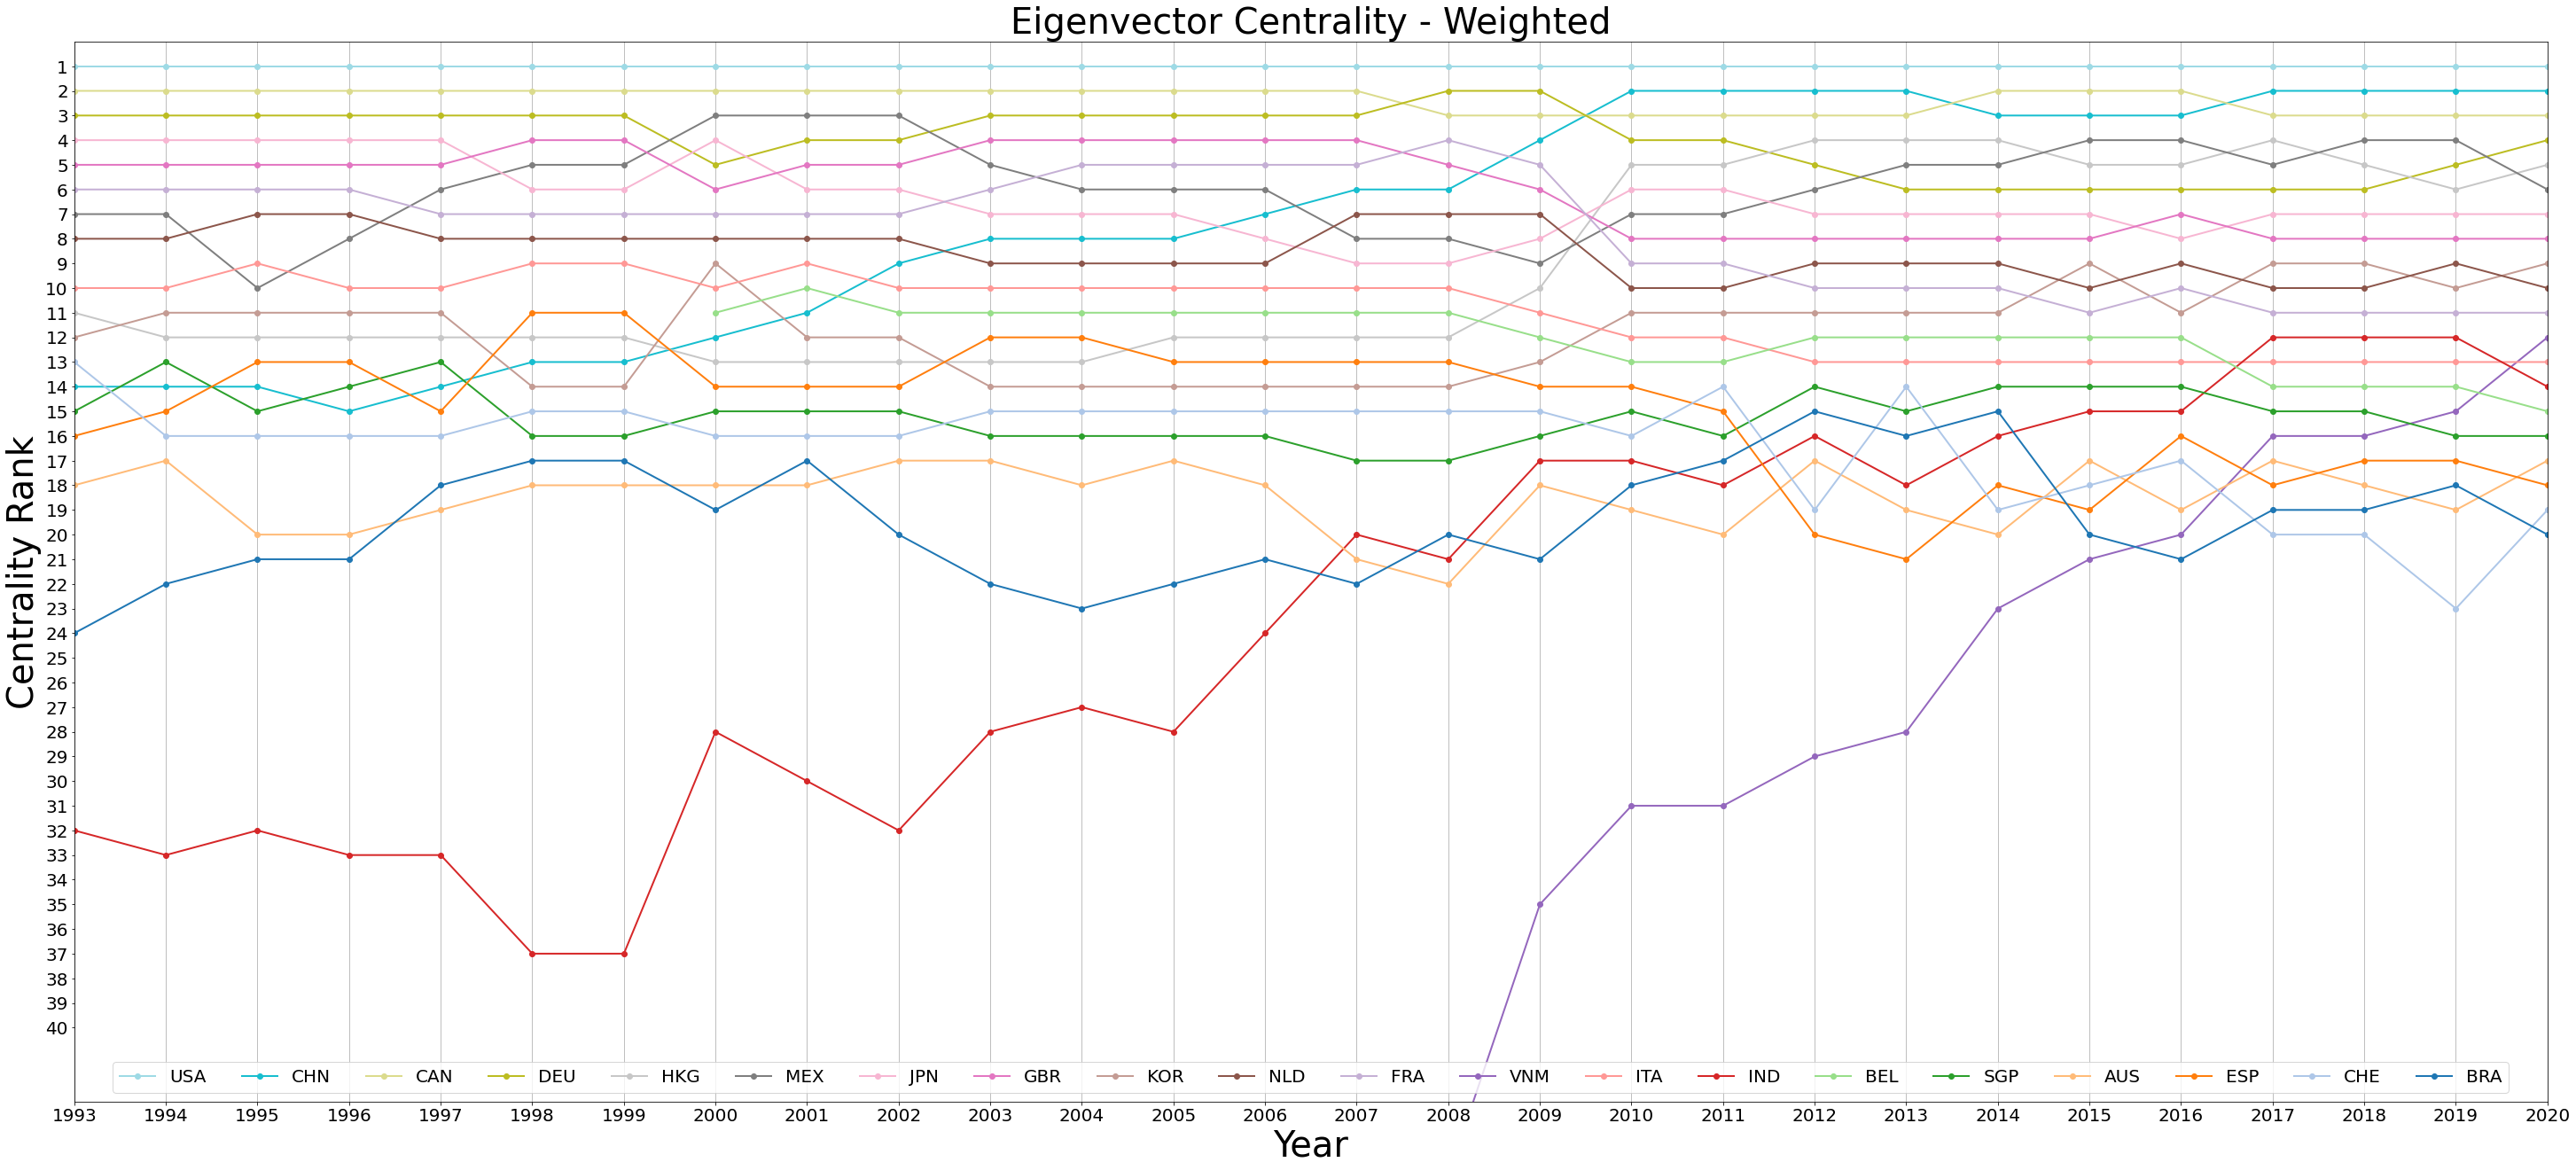

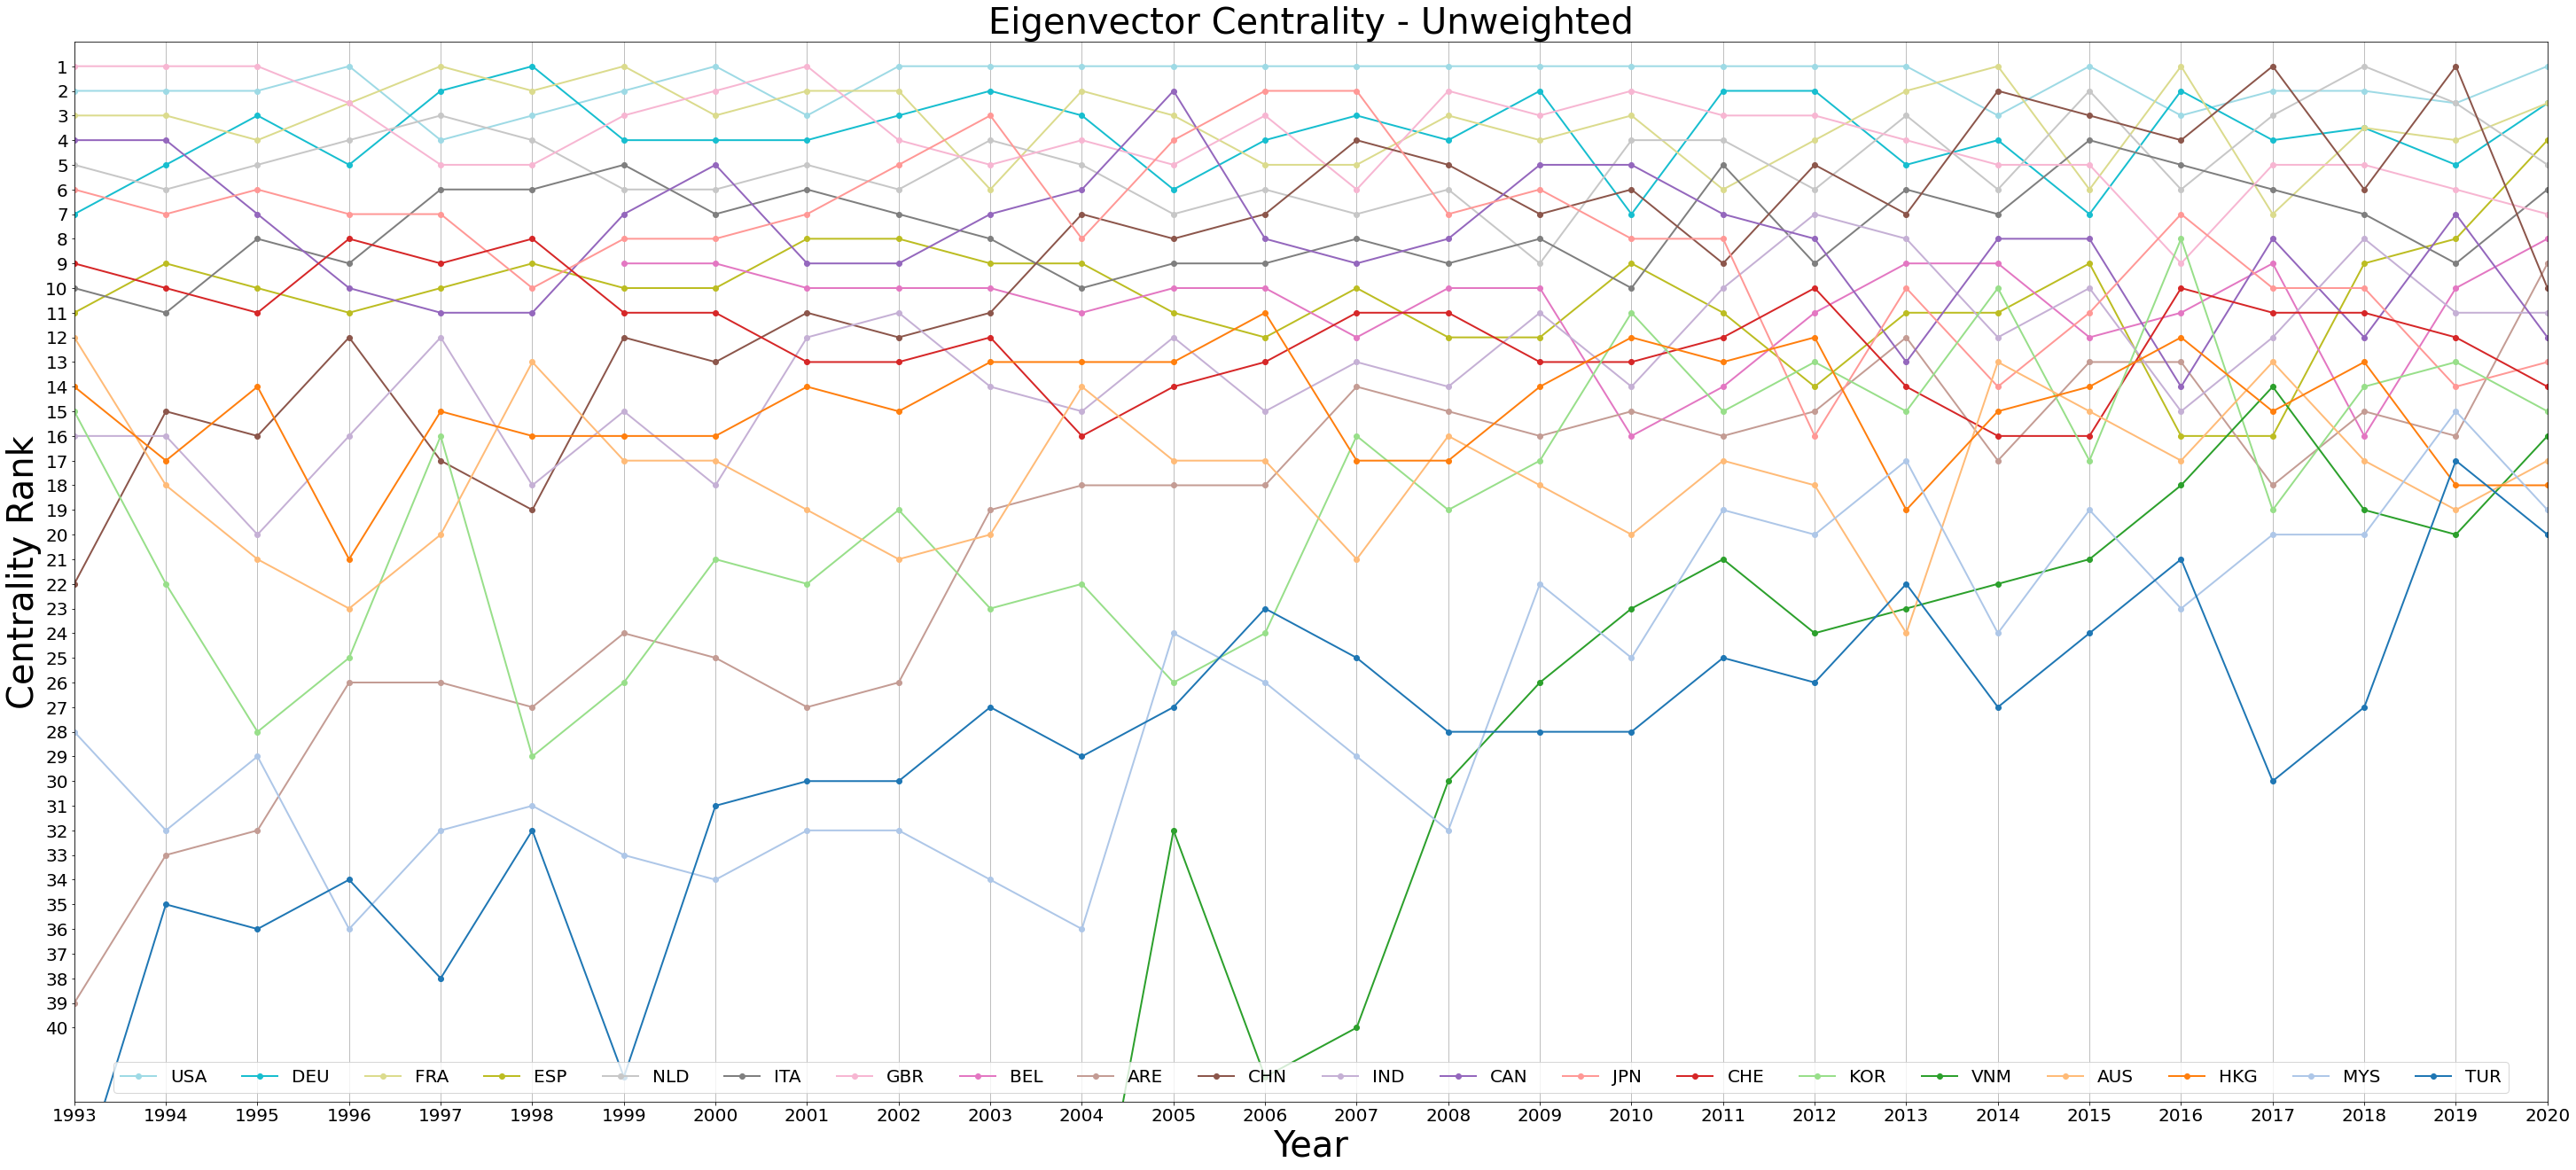

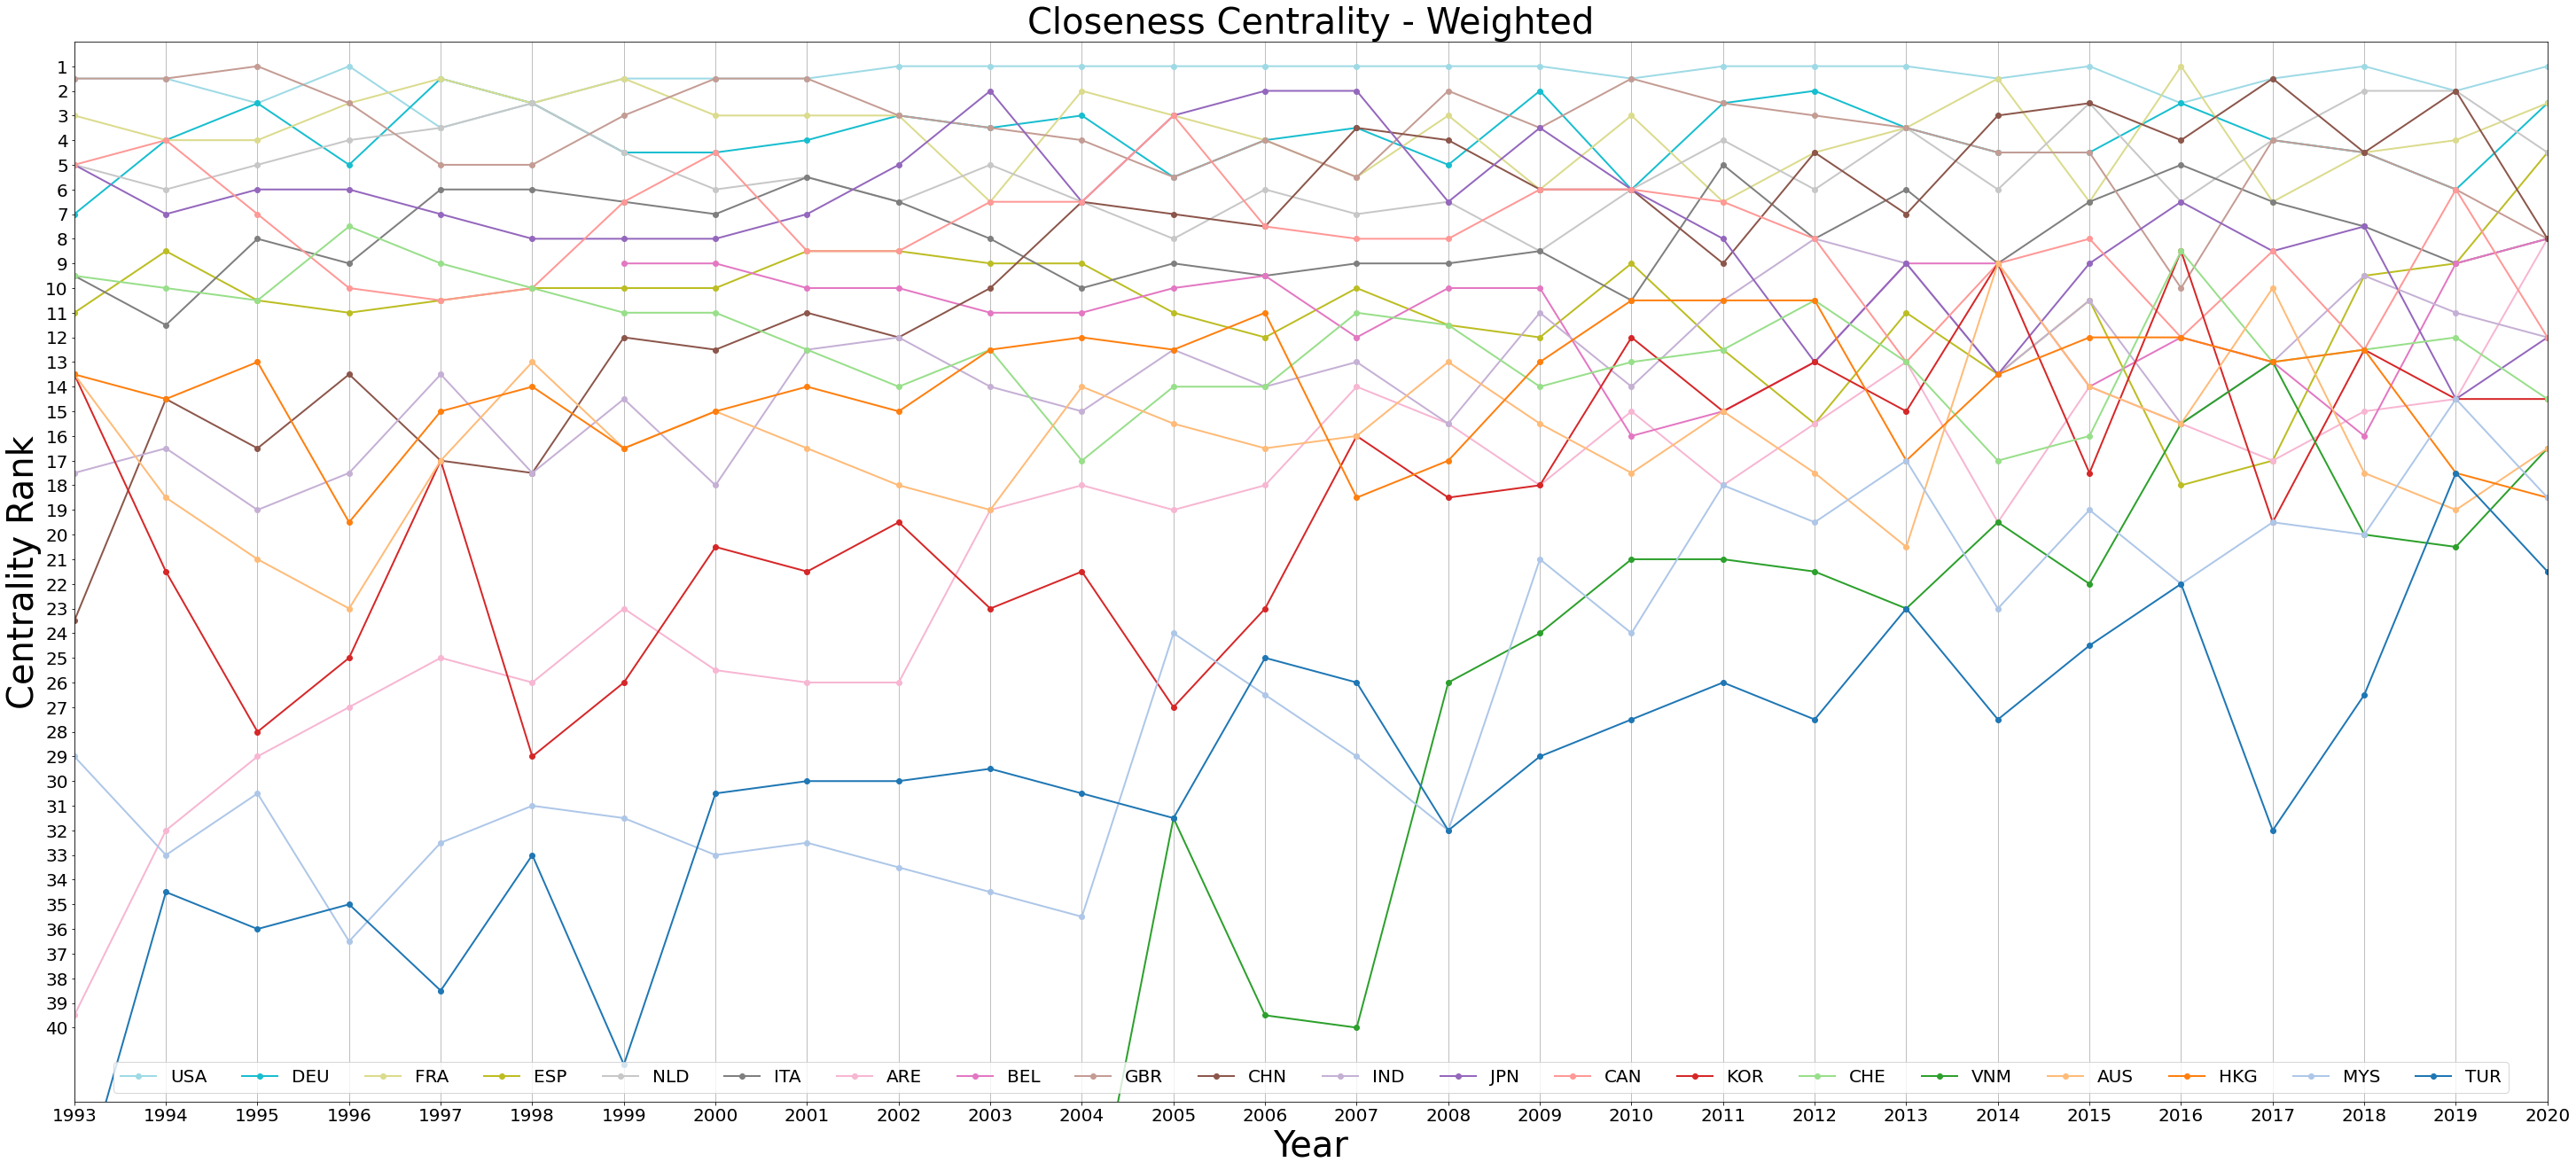

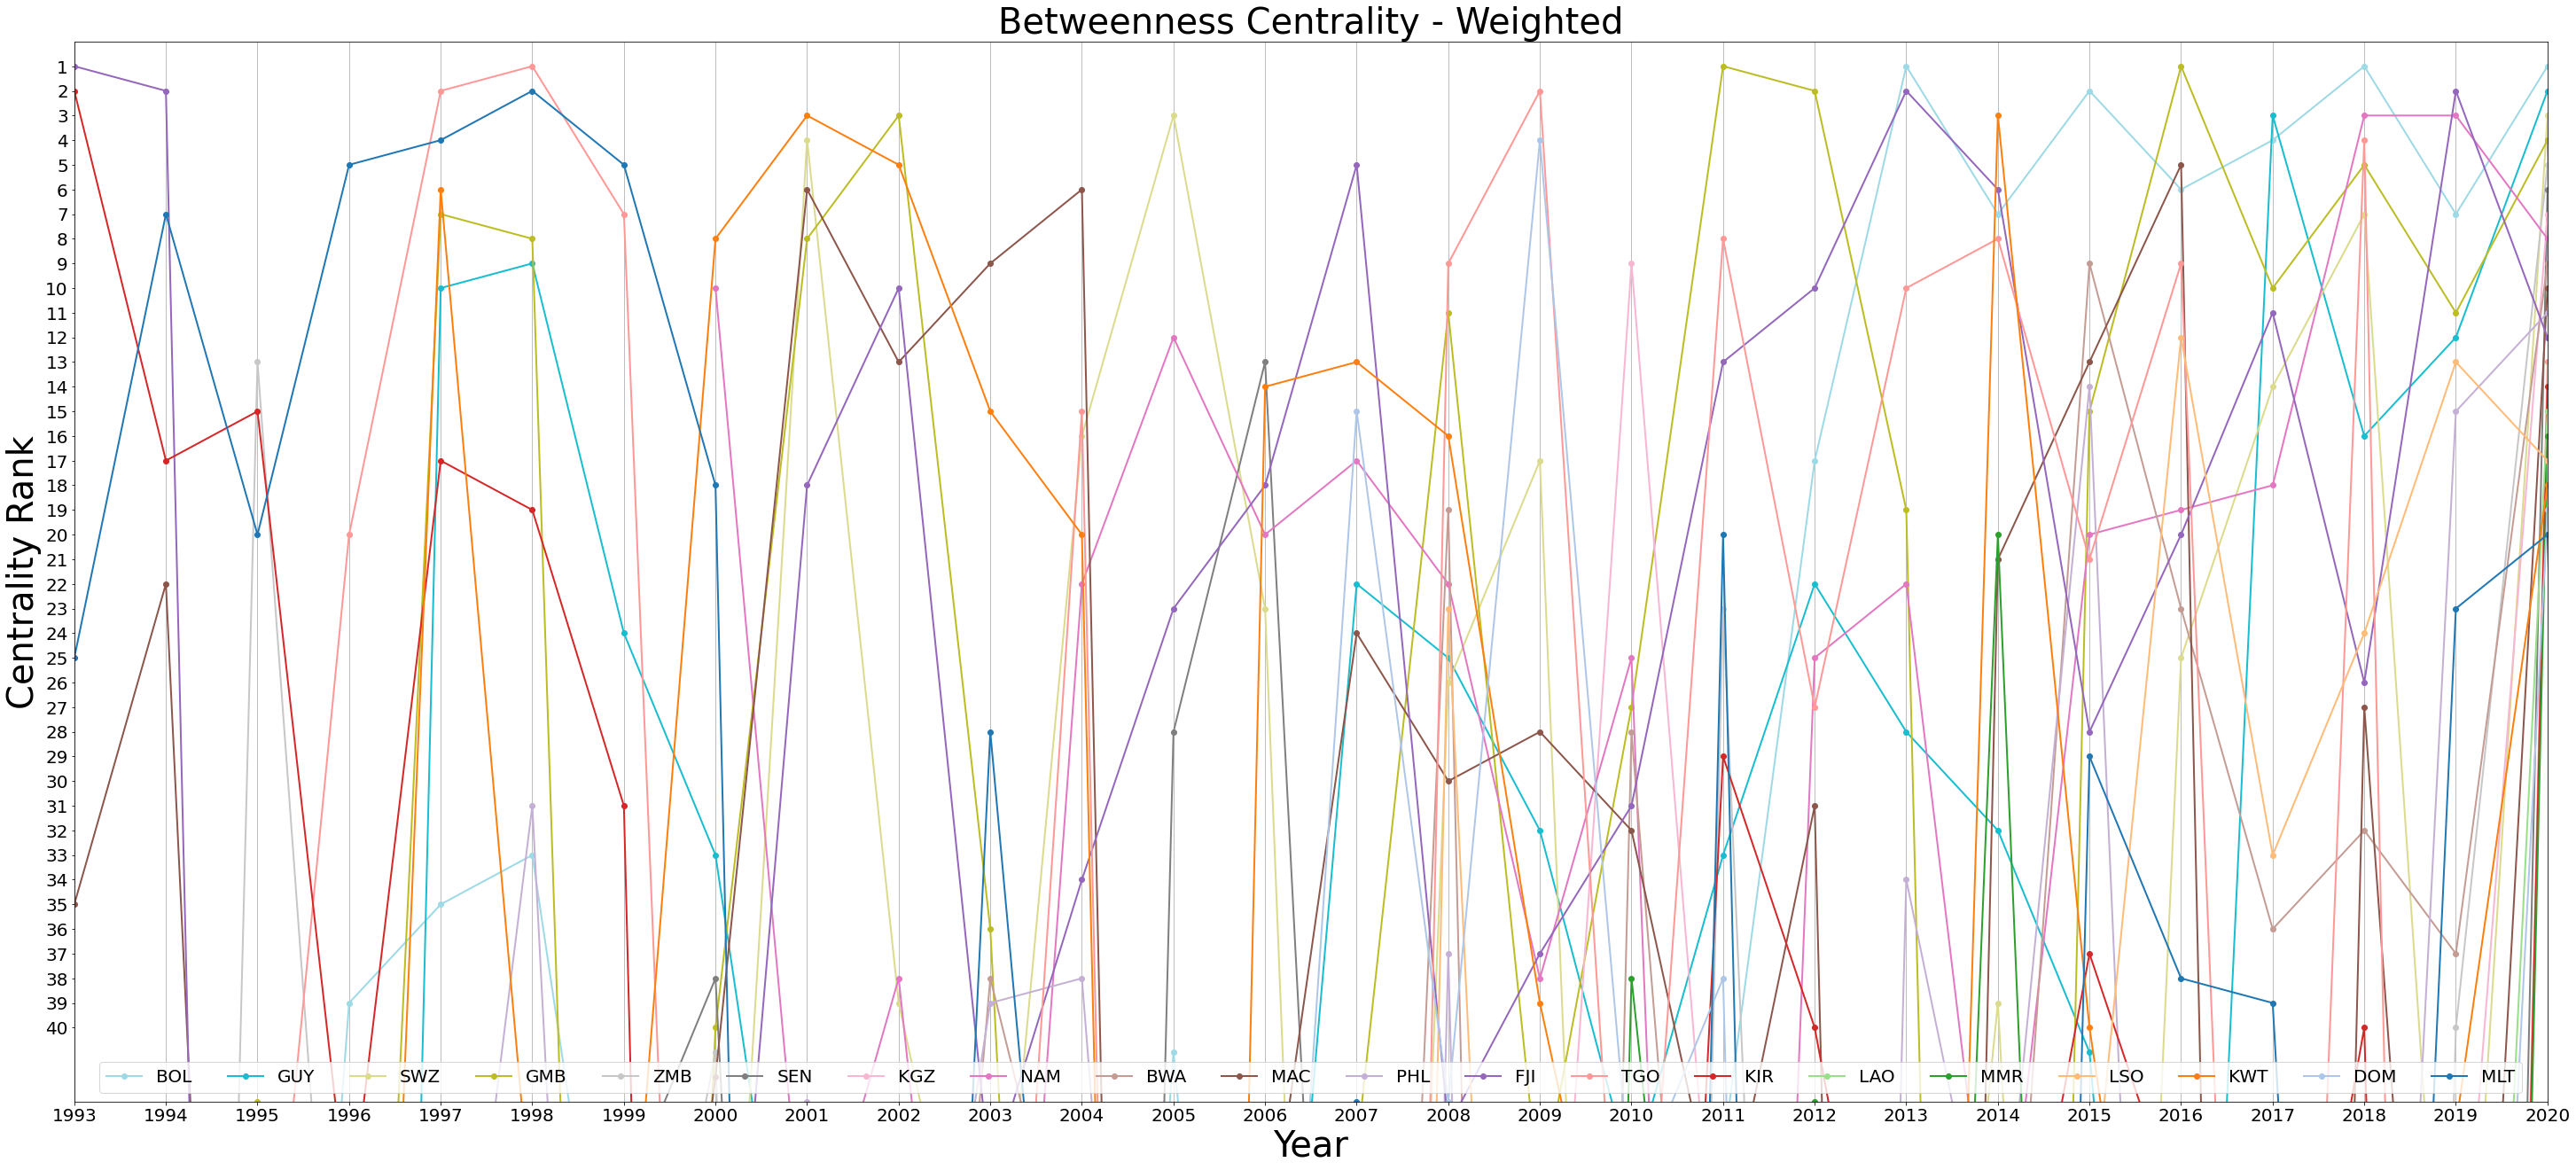

In [9]:
for i in range(len(centr_rank_dfs)):
    plot_bumpchart(df=centr_rank_dfs[i], title=centr_types[i], topN=20)